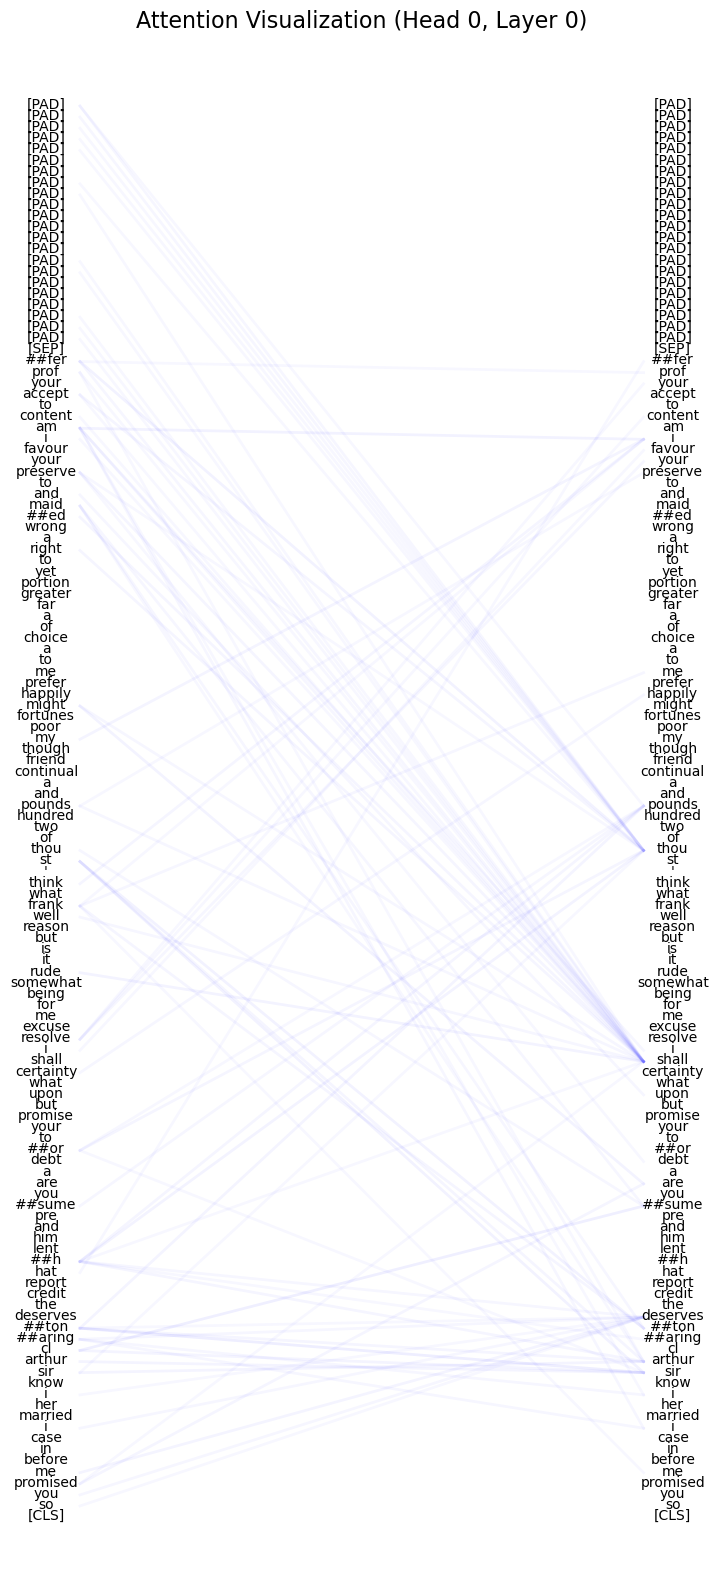

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load attention data
with open('attention_data.json', 'r') as file:
    attention_data = json.load(file)

# Head 0, Layer 0
head = 0
layer = 0

# Attention matrix to visualize
attention_matrix = np.array(attention_data[head][layer])

# Token sequence
tokens = ['[CLS]', 'so', 'you', 'promised', 'me', 'before', 'in', 'case', 'i', 'married', 'her', 'i', 'know', 
          'sir', 'arthur', 'cl', '##aring', '##ton', 'deserves', 'the', 'credit', 'report', 'hat', '##h', 'lent', 
          'him', 'and', 'pre', '##sume', 'you', 'are', 'a', 'debt', '##or', 'to', 'your', 'promise', 'but', 
          'upon', 'what', 'certainty', 'shall', 'i', 'resolve', 'excuse', 'me', 'for', 'being', 'somewhat', 'rude', 
          'it', 'is', 'but', 'reason', 'well', 'frank', 'what', 'think', "'", 'st', 'thou', 'of', 'two', 'hundred', 
          'pounds', 'and', 'a', 'continual', 'friend', 'though', 'my', 'poor', 'fortunes', 'might', 'happily', 
          'prefer', 'me', 'to', 'a', 'choice', 'of', 'a', 'far', 'greater', 'portion', 'yet', 'to', 'right', 'a', 
          'wrong', '##ed', 'maid', 'and', 'to', 'preserve', 'your', 'favour', 'i', 'am', 'content', 'to', 'accept', 
          'your', 'prof', '##fer', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
          '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
          '[PAD]', '[PAD]']

# We can adjust this as needed
threshold = 0.03

plt.figure(figsize=(8, 20))
spacing = 5 # Space between tokens in the graph

# Set y-positions (same for keys and queries)
y = np.linspace(0, len(tokens) - 1, len(tokens)) * spacing

# Plot tokens on left and right
for i, token in enumerate(tokens):
    plt.text(-1, y[i], token, ha='center', va='bottom', fontsize=10)

for i, token in enumerate(tokens):
    plt.text(len(tokens), y[i], token, ha='center', va='bottom', fontsize=10)

# Plot lines between queries and keys by iterating through attention matrix
for i in range(len(tokens)):
    for j in range(len(tokens)):
        if attention_matrix[i, j] > threshold:
            plt.plot([6, len(tokens) - 6], [y[i] + spacing/2, y[j] + spacing/2], color='blue', alpha=attention_matrix[i, j], lw=2)

plt.axis('off') # Don't plot axes
plt.title(f"Attention Visualization (Head {head}, Layer {layer})", fontsize=16)

plt.show()

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

files = ['attention_data_2r3.json', 'attention_data_2r2.json', 'attention_data_2r1.json', 'attention_data_2f3.json', 'attention_data_2f2.json', 
         'attention_data_2f1.json', 'attention_data_2d3.json', 'attention_data_2d2.json', 'attention_data_2d1.json']
# Load attention data
attention_data = []
for file in files:
   with open(file, 'r') as file:
      attention_data.append(json.load(file))
  
# want to look at last layer that does classification
layer = 11
tokens = [ ['[CLS]', 'i', 'need', 'not', 'tell', 'you', 'with', 'what', 'a', 'labyrinth', 'of', 'dangers', 'daily', 
            'the', 'best', 'part', 'of', 'my', 'whole', 'estate', "'", 's', 'en', '##cum', '##bered', 'nor', 'have', 
            'i', 'any', 'clue', 'to', 'wind', 'it', 'out', 'but', 'what', 'occasion', 'prof', '##fers', 'me', 
            'wherein', 'if', 'you', 'should', 'fa', '##lter', 'i', 'shall', 'have', 'the', 'shame', 'and', 'you', 
            'the', 'loss', 'on', 'these', 'two', 'points', 'rely', 'our', 'happiness', 'or', 'ruin', 'if', 'you', 
            'marry', 'with', 'wealthy', 'carter', "'", 's', 'daughter', 'there', "'", 's', 'a', 'portion', 'will', 
            'free', 'my', 'land', 'all', 'which', 'i', 'will', 'ins', '##tate', 'upon', 'the', 'marriage', 'to', 'you', 
            'otherwise', 'i', 'must', 'be', 'of', 'necessity', 'enforced', 'to', 'make', 'a', 'present', 'sale', 'of', 
            'all', 'and', 'yet', 'for', 'aug', '##ht', 'i', 'know', 'live', 'in', 'as', 'poor', 'distress', 'or', 'worse', 
            'than', 'now', 'i', 'do', 'you', 'hear', '[SEP]'], 
            ['[CLS]', 'what', 'do', 'you', 'take', 'me', 'for', 'one', 'that', 'nor', 'hopes', 'the', 'blessed', '##ness', 
             'of', 'life', 'here', '##af', '##ter', 'neither', 'fears', 'the', 'vengeance', 'due', 'to', 'such', 'as', 'make', 
             'the', 'marriage', 'bed', 'an', 'inn', 'which', 'travellers', 'day', 'and', 'night', 'after', 'a', 'to', '##ils', 
             '##ome', 'lodging', 'leave', 'at', 'pleasure', 'am', 'i', 'become', 'so', 'ins', '##ens', '##ible', 'of', 'losing', 
             'the', 'glory', 'of', 'creation', "'", 's', 'work', 'my', 'soul', 'o', 'i', 'have', 'lived', 'too', 'long', 'thou', 
             'has', '##t', 'di', '##sse', '##mble', '##r', 'dar', "'", 'st', 'thou', 'per', '##se', '##ver', 'yet', 'and', 
             'pull', 'down', 'wrath', 'as', 'hot', 'as', 'flames', 'of', 'hell', 'to', 'strike', 'thee', 'quick', 'into', 'the', 
             'grave', 'of', 'horror', 'i', 'believe', 'thee', 'not', 'get', 'from', 'my', 'sight', 'sir', 'though', 'mine', 
             'innocence', 'needs', 'not', 'a', 'stronger', 'witness', 'than', 'the', 'clear', '##ness', 'of', '[SEP]'], 
            ['[CLS]', 'so', 'you', 'promised', 'me', 'before', 'in', 'case', 'i', 'married', 'her', 'i', 'know', 'sir', 
             'arthur', 'cl', '##aring', '##ton', 'deserves', 'the', 'credit', 'report', 'hat', '##h', 'lent', 'him', 'and', 
             'pre', '##sume', 'you', 'are', 'a', 'debt', '##or', 'to', 'your', 'promise', 'but', 'upon', 'what', 'certainty', 
             'shall', 'i', 'resolve', 'excuse', 'me', 'for', 'being', 'somewhat', 'rude', 'it', 'is', 'but', 'reason', 'well',
             'frank', 'what', 'think', "'", 'st', 'thou', 'of', 'two', 'hundred', 'pounds', 'and', 'a', 'continual', 'friend', 
             'though', 'my', 'poor', 'fortunes', 'might', 'happily', 'prefer', 'me', 'to', 'a', 'choice', 'of', 'a', 'far', 'greater', 
             'portion', 'yet', 'to', 'right', 'a', 'wrong', '##ed', 'maid', 'and', 'to', 'preserve', 'your', 'favour', 'i', 
             'am', 'content', 'to', 'accept', 'your', 'prof', '##fer', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]'], 
            ['[CLS]', 'there', "'", 's', 'my', 'rival', 'taken', 'up', 'for', 'hang', '##man', "'", 's', 'meat', 'tom', 'told', 
             'me', 'he', 'was', 'about', 'a', 'piece', 'of', 'villa', '##ny', 'mates', 'and', 'morris', 'men', 'you', 'see', 'here', 
             "'", 's', 'no', 'longer', 'pip', '##ing', 'no', 'longer', 'dancing', 'this', 'news', 'of', 'murder', 'has', 'slain', 'the',
            'morris', 'you', 'that', 'go', 'the', 'foot', '##way', 'fare', 'ye', 'well', 'i', 'am', 'for', 'a', 'gallo', '##p', 'hobby', 
            'horse', 'and', 'the', '~', 'dog', '~', 'nay', 'an', 'my', 'fiddle', 'be', 'come', 'to', 'himself', 'again', 'i', 'care', 
            'not', 'i', 'think', 'the', 'devil', 'has', 'been', 'abroad', 'amongst', 'us', 'to', 'day', 'i', "'", 'll', 'keep', 'thee', 
            'out', 'of', 'thy', 'fit', 'now', 'if', 'i', 'can', 'these', 'things', 'are', 'full', 'of', 'horror', 'full', 'of', 'pity', 
            'but', 'if', 'this', 'time', 'be', 'constant', 'to', 'the', 'proof', 'the', 'guilt', '[SEP]'], 
            ['[CLS]', 'i', 'dare', 'be', 'confident', 'she', 'is', 'not', 'altered', 'from', 'what', 'i', 'left', 'her', 'at', 'our', 'parting', 
             'last', 'are', 'you', 'fair', 'maid', 'you', 'took', 'too', 'sure', 'possession', 'of', 'an', 'engaged', 'heart', 'which', 'now', 
             'i', 'challenge', 'marry', 'and', 'much', 'good', 'may', 'it', 'do', 'thee', 'son', 'take', 'her', 'to', 'thee', 'get', 'me', 'a', 
             'brace', 'of', 'boys', 'at', 'a', 'burt', '##hen', 'frank', 'the', 'nursing', 'shall', 'not', 'stand', 'thee', 'in', 'a', 'penny', 
             '##worth', 'of', 'milk', 'reach', 'her', 'home', 'and', 'spare', 'not', 'when', "'", 's', 'the', 'day', 'to', 'morrow', 'if', 'you', 
             'please', 'to', 'use', 'ceremony', 'of', 'charge', 'and', 'custom', 'were', 'to', 'little', 'purpose', 'their', 'loves', 'are', 
             'married', 'fast', 'enough', 'already', 'a', 'good', 'motion', 'we', "'", 'll', 'e', "'", 'en', 'have', 'an', 'household', 'dinner', 
             'and', 'let', 'the', 'fiddle', '##rs', 'go', 'scrape', 'let', 'the', '[SEP]'], 
            ['[CLS]', 'yes', 'and', 'most', 'sudden', 'remember', 'the', 'fore', 'gallant', 'and', 'forget', 'the', 'hobby', 'horse', 'the', 'whole', 
             'body', 'of', 'your', 'morris', 'will', 'be', 'darkened', 'there', 'be', 'of', 'us', 'but', "'", 'tis', 'no', 'matter', 'forget', 'the', 
             'hobby', 'horse', 'have', 'you', 'forgot', 'since', 'he', 'paced', 'it', 'from', 'enfield', 'chase', 'to', 'edmonton', 'cu', '##ddy', 
             'honest', 'cu', '##ddy', 'cast', 'thy', 'stuff', 'suffer', 'may', 'ye', 'all', 'it', 'shall', 'be', 'known', 'i', 'can', 'take', 'mine', 
             'ease', 'as', 'well', 'as', 'another', 'man', 'seek', 'your', 'hobby', 'horse', 'where', 'you', 'can', 'get', 'him', '[SEP]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], 
            ['[CLS]', 'change', 'thy', 'con', '##ce', '##it', 'i', 'pri', '##the', '##e', 'thou', 'art', 'all', 'perfection', 'diana', 'herself', 'swell', 
             '##s', 'in', 'thy', 'thoughts', 'and', 'moderate', '##s', 'thy', 'beauty', 'within', 'thy', 'left', 'eye', 'amor', '##ous', 'cup', '##id', 
             'sits', 'feather', '##ing', 'love', 'shafts', 'whose', 'golden', 'heads', 'he', 'dipped', 'in', 'thy', 'cha', '##ste', 'breast', 'in', 'the', 
             'other', 'lies', 'blushing', 'ad', '##onis', 'scarf', '##ed', 'in', 'modest', '##ies', 'and', 'still', 'as', 'want', '##on', 'cup', '##id', 
             'blows', 'love', 'fires', 'ad', '##onis', 'que', '##nche', '##s', 'out', 'un', '##cha', '##ste', 'desires', 'and', 'from', 'these', 'two', 
             'i', 'briefly', 'do', 'imply', 'a', 'perfect', 'emblem', 'of', 'thy', 'modest', '##y', 'then', 'pri', '##the', '##e', 'dear', 'maintain', 
             'no', 'more', 'dispute', 'for', 'when', 'thou', 'speak', "'", 'st', 'it', "'", 's', 'fit', 'all', 'tongues', 'be', 'mute', '[SEP]', '[PAD]', 
             '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], 
            ['[CLS]', 'and', 'why', 'on', 'me', 'why', 'should', 'the', 'en', '##vious', 'world', 'throw', 'all', 'their', 'scandal', '##ous', 'malice', 
             'upon', 'me', "'", 'cause', 'i', 'am', 'poor', 'def', '##or', '##med', 'and', 'ignorant', 'and', 'like', 'a', 'bow', 'buckled', 'and', 
             'bent', 'together', 'by', 'some', 'more', 'strong', 'in', 'mischief', '##s', 'than', 'myself', 'must', 'i', 'for', 'that', 'be', 'made', 
             'a', 'common', 'sink', 'for', 'all', 'the', 'fi', '##lth', 'and', 'rubbish', 'of', 'men', "'", 's', 'tongues', 'to', 'fall', 'and', 'run', 
             'into', 'some', 'call', 'me', 'witch', 'and', 'being', 'ignorant', 'of', 'myself', 'they', 'go', 'about', 'to', 'teach', 'me', 'how', 'to', 
             'be', 'one', 'urging', 'that', 'my', 'bad', 'tongue', 'by', 'their', 'bad', 'usage', 'made', 'so', 'for', '##sp', '##eak', '##s', 'their', 
             'cattle', 'dot', '##h', 'be', '##wi', '##tch', 'their', 'corn', 'themselves', 'their', 'servants', 'and', 'their', 'babe', '##s', 'at', 
             'nurse', 'this', 'they', 'enforce', '[SEP]'], 
             ['[CLS]', 'come', 'do', 'not', 'fear', 'i', 'love', 'thee', 'much', 'too', 'well', 'to', 'hurt', 'or', 'fright', 'thee', 'if', 'i', 'seem', 
              'terrible', 'it', 'is', 'to', 'such', 'as', 'hate', 'me', 'i', 'have', 'found', 'thy', 'love', 'un', '##fe', '##ign', '##ed', 'have', 
              'seen', 'and', 'pit', '##ied', 'thy', 'open', 'wrong', '##s', 'and', 'come', 'out', 'of', 'my', 'love', 'to', 'give', 'thee', 'just', 
              'revenge', 'against', 'thy', 'foe', '##s', 'may', 'i', 'believe', 'thee', 'to', 'confirm', "'", 't', 'command', 'me', 'do', 'any', 
              'mischief', 'unto', 'man', 'or', 'beast', 'and', 'i', "'", 'll', 'effect', 'it', 'on', 'condition', 'that', 'un', '##com', '##pel', '##led', 
              'thou', 'make', 'a', 'deed', 'of', 'gift', 'of', 'soul', 'and', 'body', 'to', 'me', 'my', 'soul', 'and', 'body', 'and', 'that', 'instantly', 
              'and', 'seal', 'it', 'with', 'thy', 'blood', 'if', 'thou', 'denies', '##t', 'i', "'", 'll', 'tear', 'thy', 'body', 'in', 'a', '[SEP]']
            ]


[[0.12012985 0.0126492  0.00488263 ... 0.00783254 0.02145267 0.28725666]
 [0.11624074 0.00726966 0.05815666 ... 0.00767036 0.0131355  0.27894836]
 [0.08099202 0.10463614 0.04786658 ... 0.00545442 0.00725588 0.18192632]
 ...
 [0.05074678 0.00561164 0.00824362 ... 0.01474117 0.08793823 0.18076363]
 [0.02769072 0.00571576 0.00595538 ... 0.09694837 0.07017882 0.2382002 ]
 [0.1547091  0.00676579 0.00398332 ... 0.00831529 0.01560435 0.34493604]]
[[0.12375277 0.00969467 0.0052772  ... 0.00473755 0.00699076 0.28481977]
 [0.09439857 0.0222895  0.02979385 ... 0.00100889 0.00266339 0.2778172 ]
 [0.10454257 0.1210972  0.03360955 ... 0.0009983  0.00181549 0.157293  ]
 ...
 [0.03132776 0.00274568 0.00244347 ... 0.03758958 0.02863738 0.28084638]
 [0.03610919 0.00380185 0.0025661  ... 0.14159417 0.0182947  0.20880366]
 [0.15386948 0.00341617 0.00375848 ... 0.00576363 0.00804686 0.34598765]]
[[0.1326975  0.01295602 0.01206787 ... 0.         0.         0.        ]
 [0.15206259 0.03017144 0.02390351 ... 

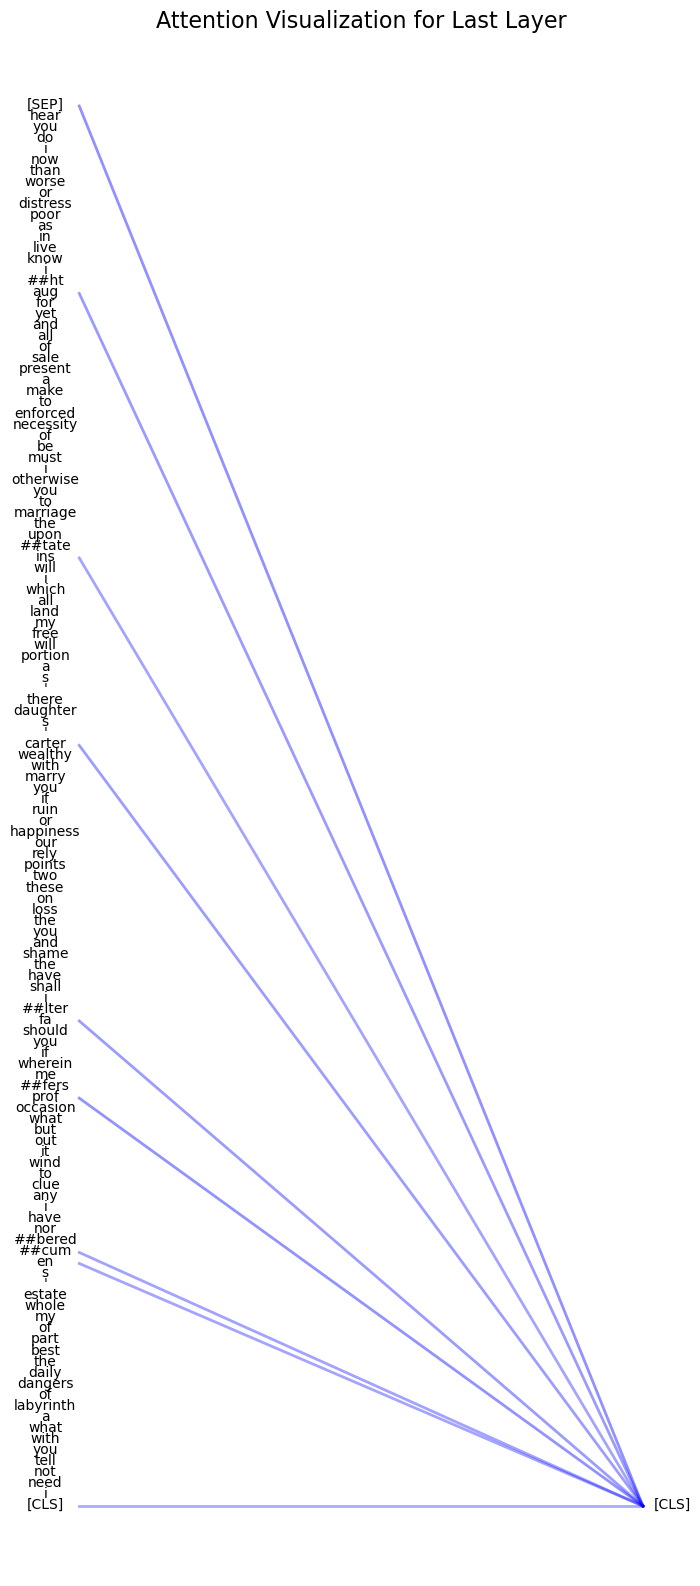

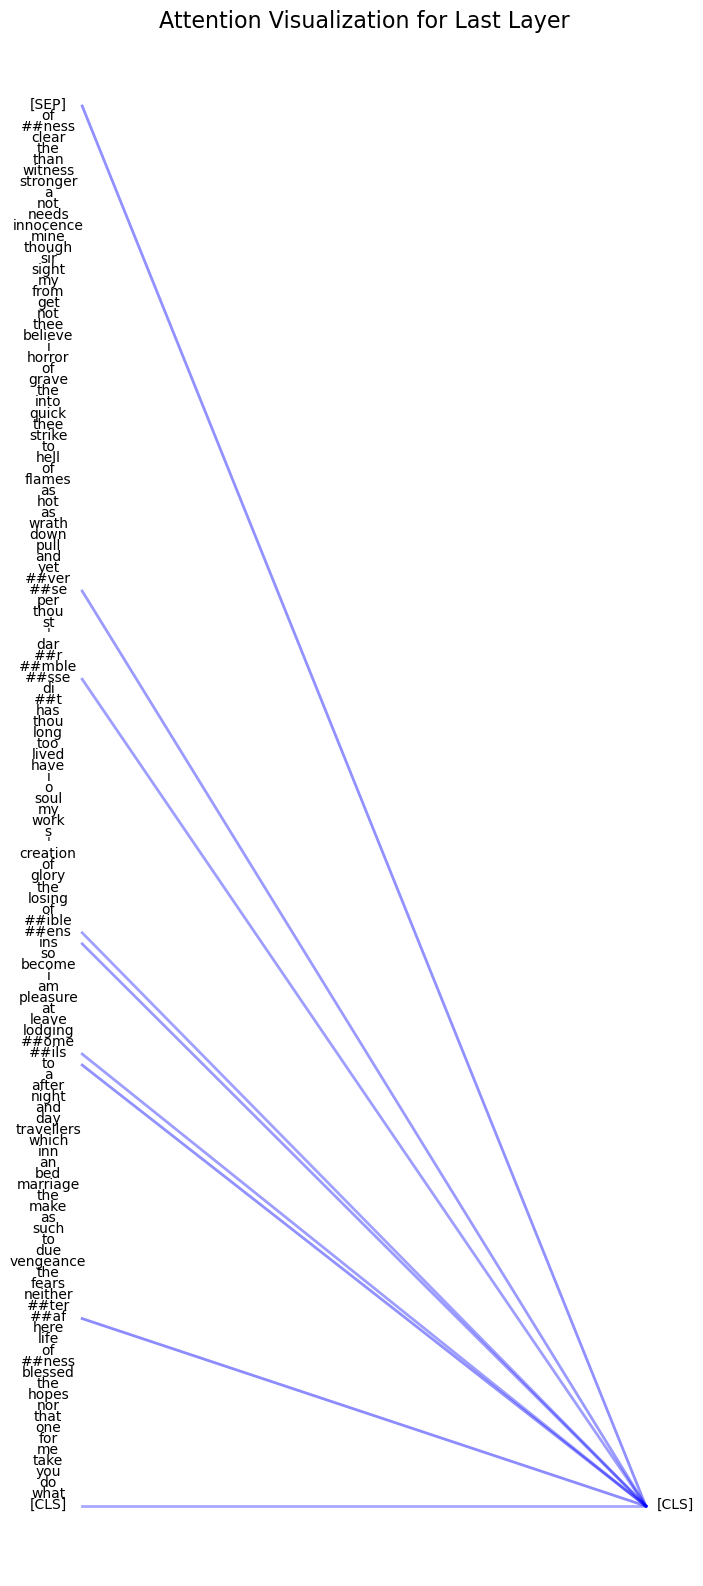

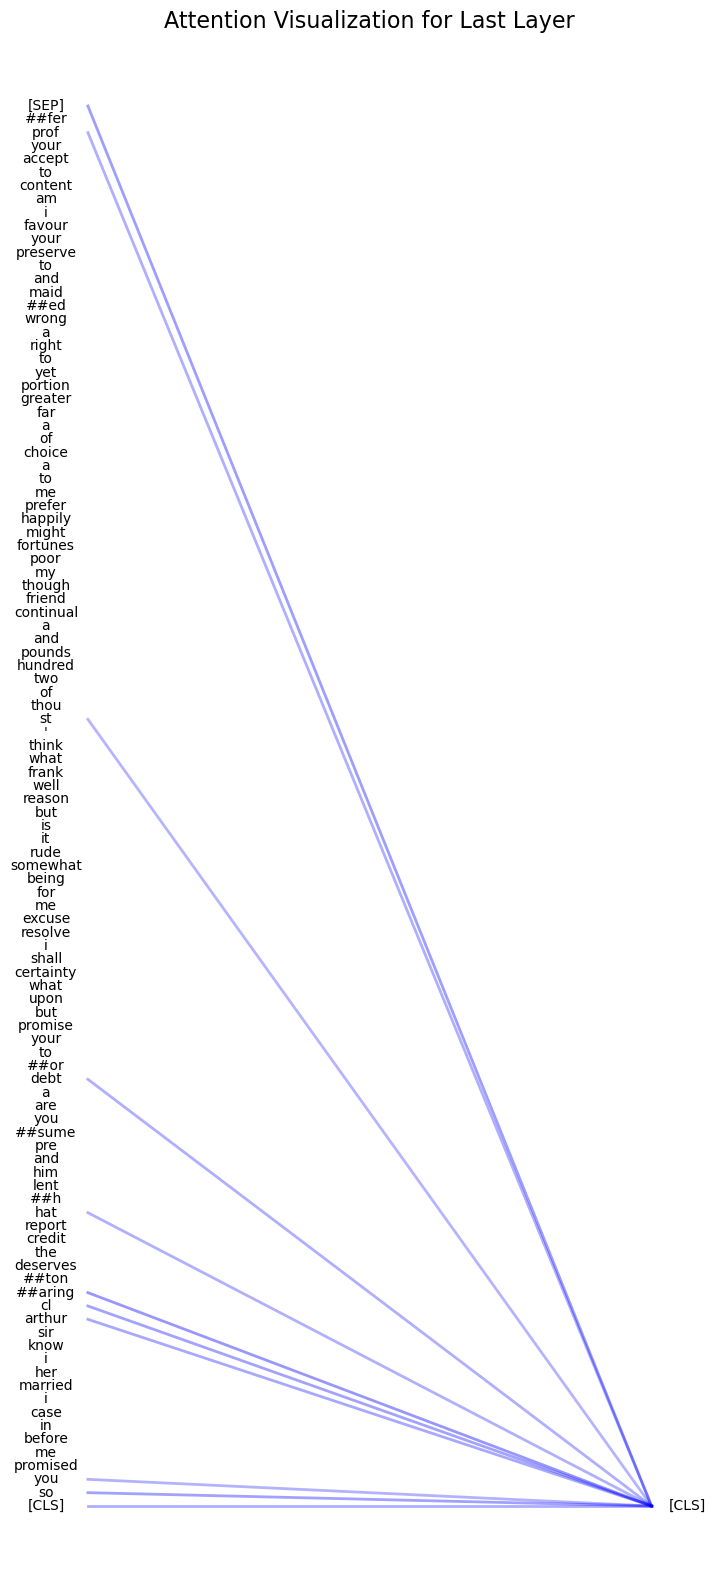

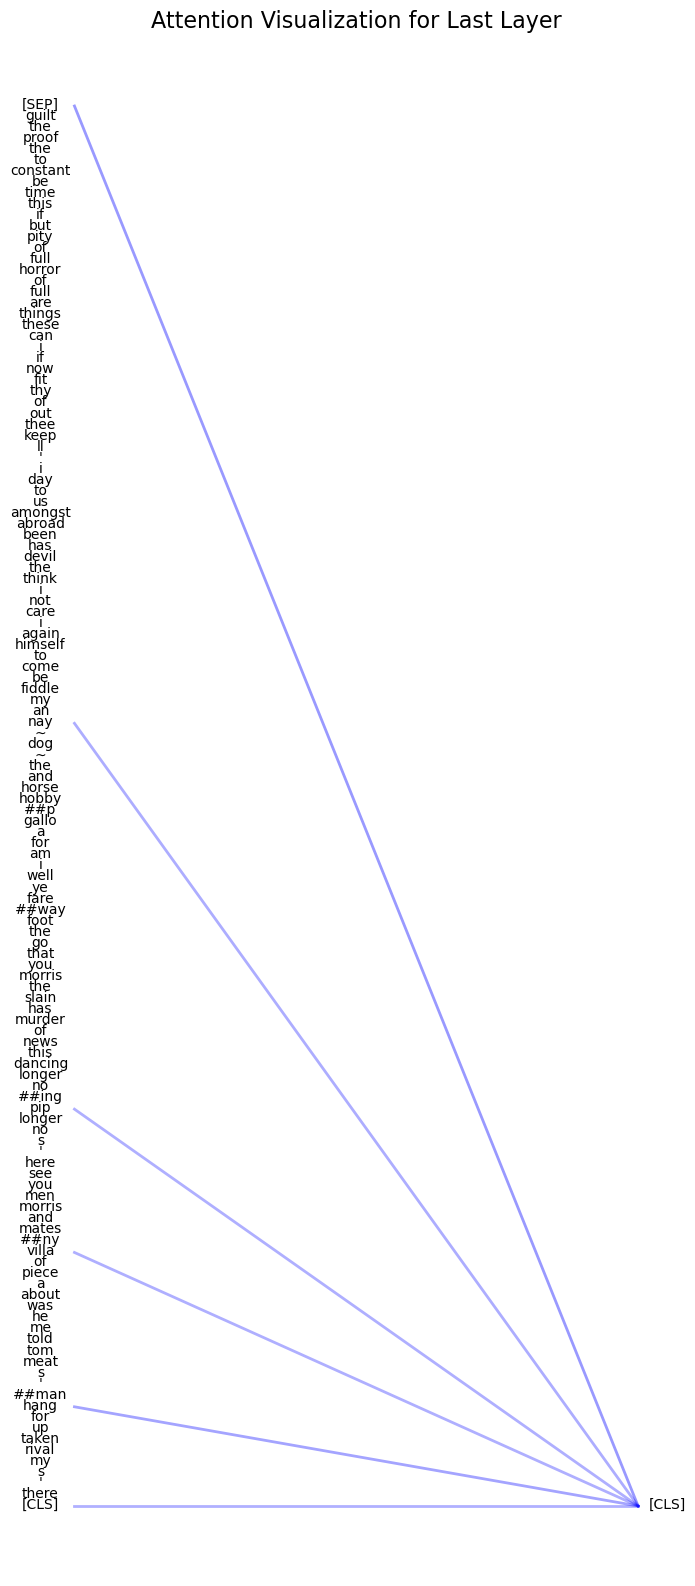

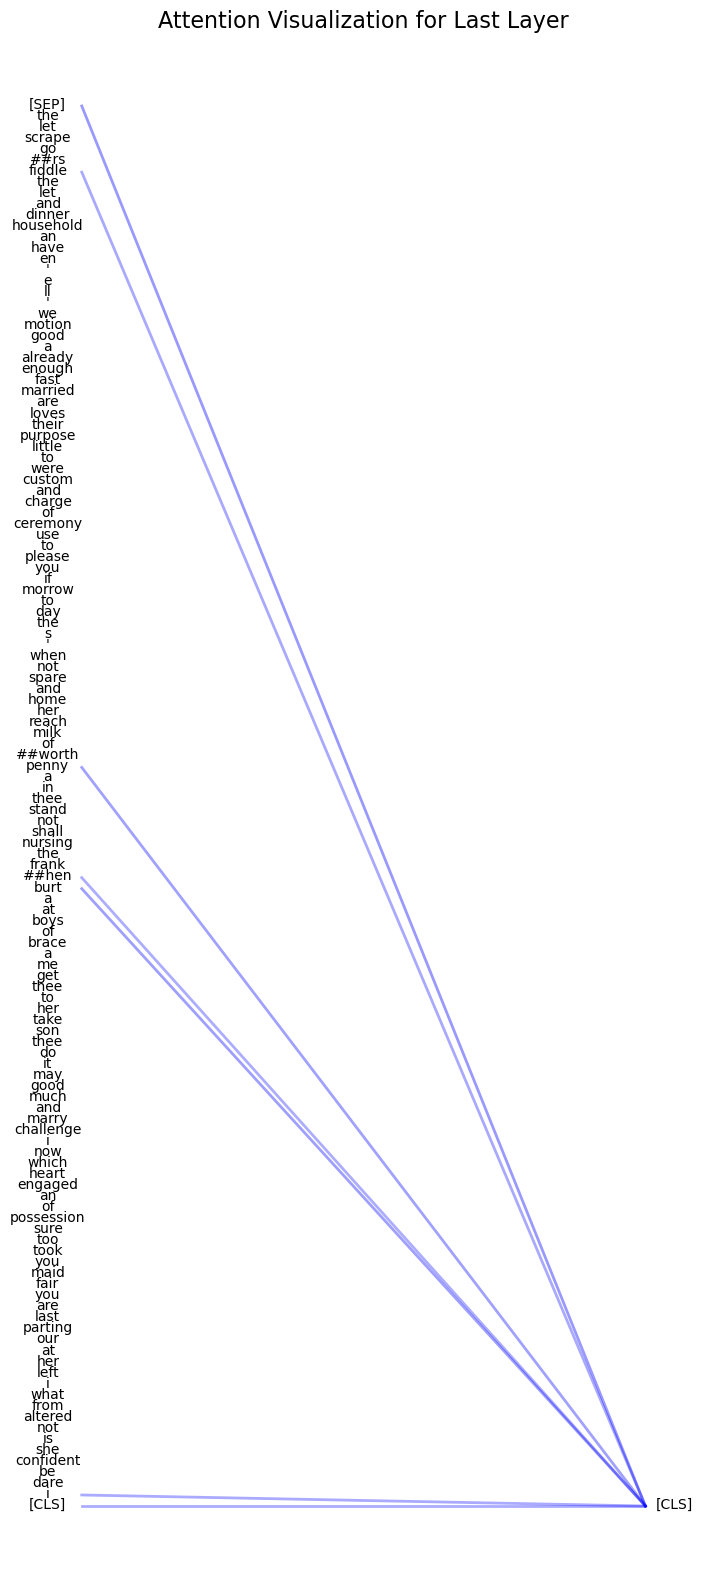

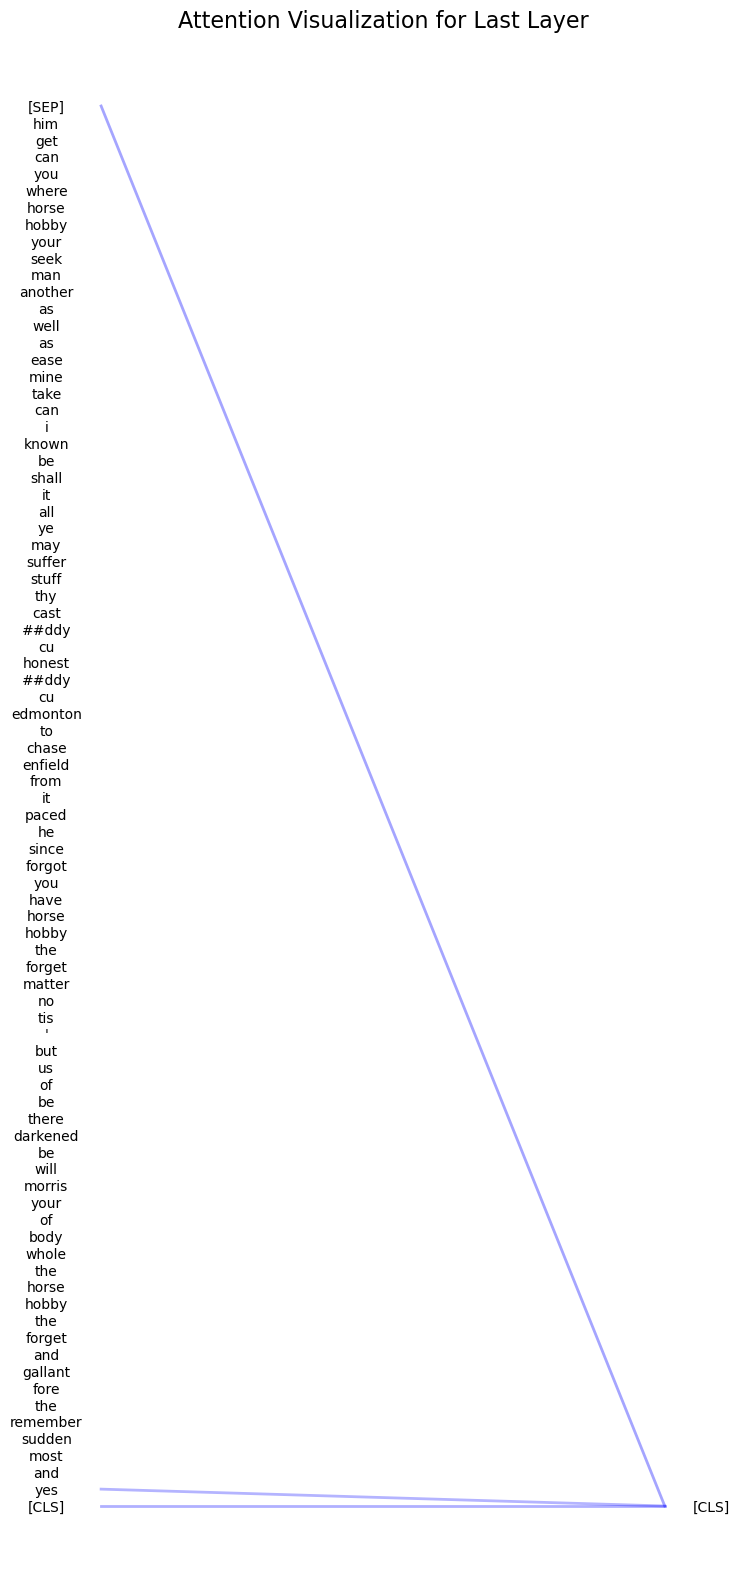

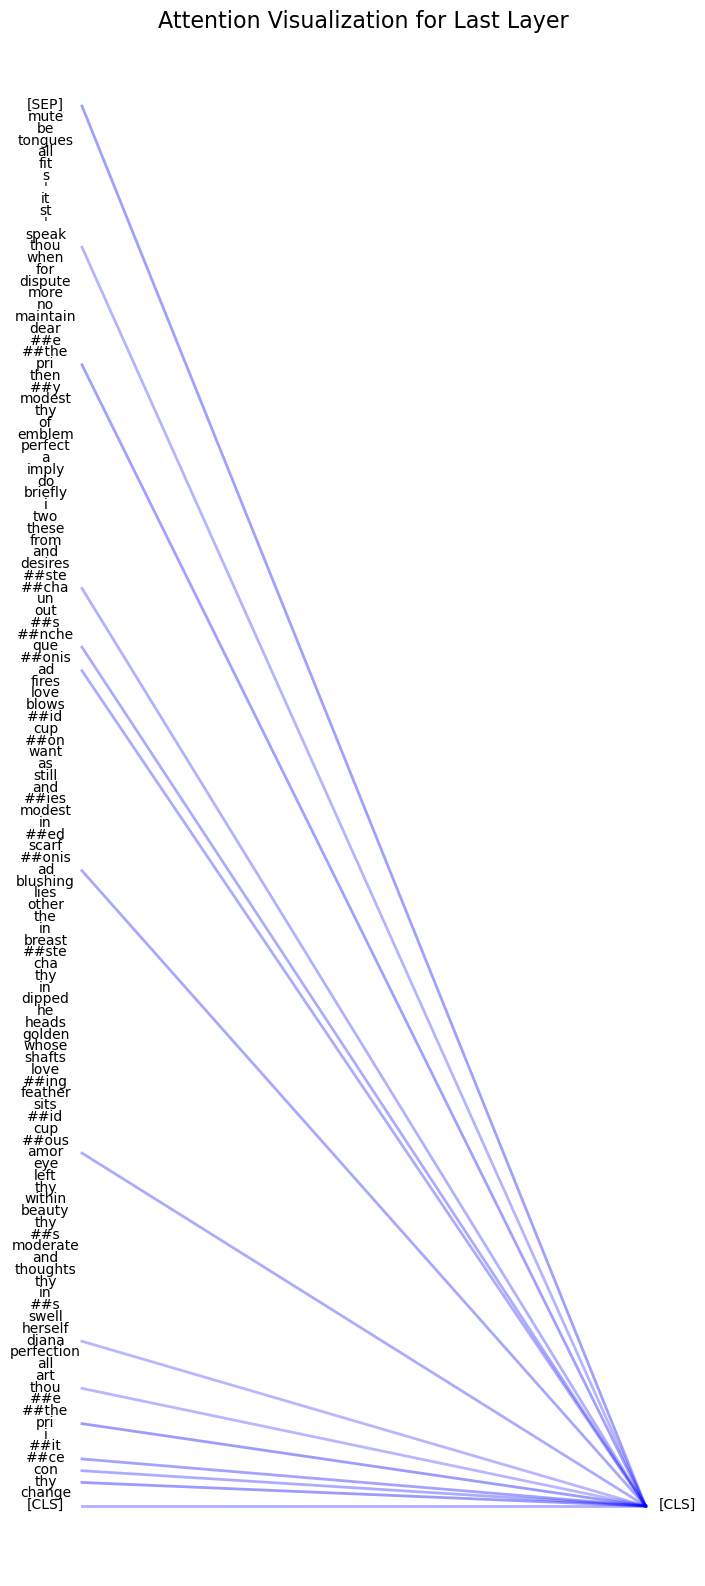

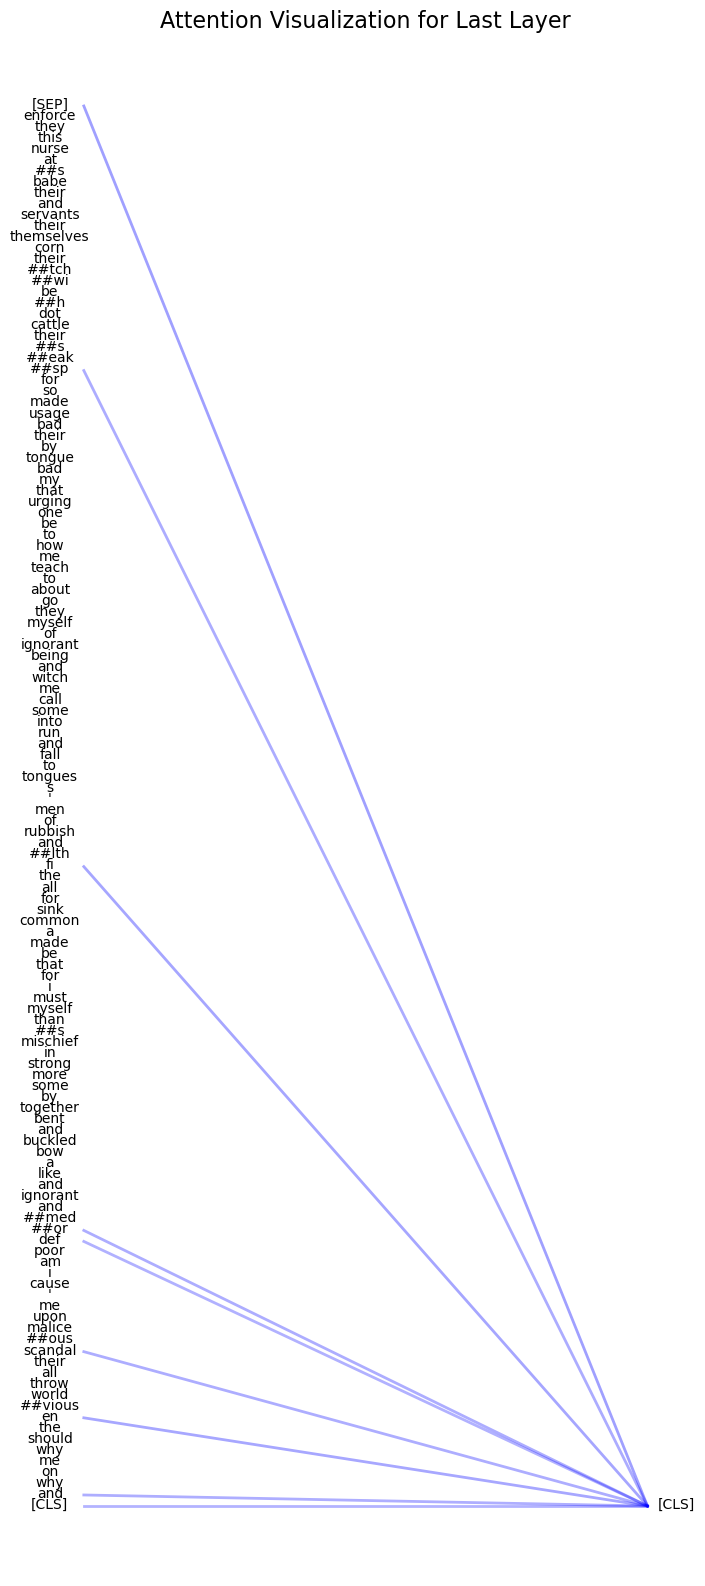

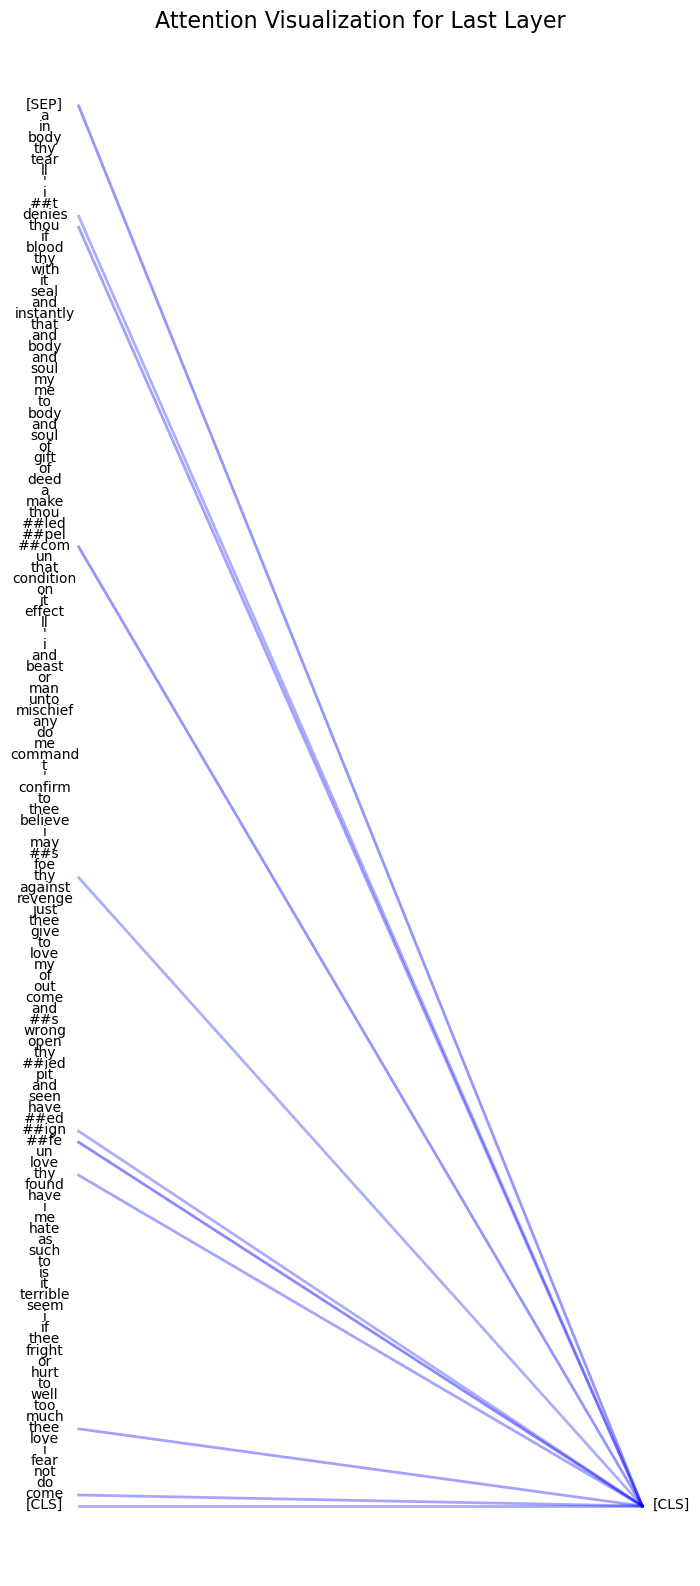

In [26]:
for x, attention in enumerate(attention_data):
   average_attention_matrices = []


   for i in range(np.shape(attention)[0]):
      matrix = np.array(attention[i][layer])
      average_attention_matrices.append(matrix)
   attention_matrix = np.mean(average_attention_matrices, axis=0)
   print(attention_matrix)



   # Remove padding tokens[x]
   non_pad_indices = [i for i, token in enumerate(tokens[x]) if token != '[PAD]']
   filtered_tokens = [tokens[x][i] for i in non_pad_indices]
   filtered_attention_matrix = attention_matrix[np.ix_(non_pad_indices, non_pad_indices)]
   cls_index = filtered_tokens.index('[CLS]')


   # We can adjust this as needed
   threshold = 0.12


   plt.figure(figsize=(8, 20))
   spacing = 5  # Space between tokens[x] in the graph


   # Set y-positions (same for keys and queries)
   y = np.linspace(0, len(filtered_tokens) - 1, len(filtered_tokens)) * spacing


   # Plot tokens[x] on left
   for i, token in enumerate(filtered_tokens):
      plt.text(-1, y[i], token, ha='center', va='bottom', fontsize=10)
   # Plot classification token on right
   plt.text(len(filtered_tokens), y[cls_index], '[CLS]', ha='center', va='bottom', fontsize=10)

   min_alpha = filtered_attention_matrix.min()
   max_alpha = filtered_attention_matrix.max()
   alpha_range = max_alpha - min_alpha

   # Plot lines between queries and keys by iterating through filtered attention matrix
   for i in range(len(filtered_tokens)):
      if filtered_attention_matrix[i, cls_index] > threshold:
         if alpha_range > 0:
            normalized_alpha = (filtered_attention_matrix[i, cls_index] - min_alpha) / alpha_range
         else:
            normalized_alpha = 1
         # print("normalized alpha: " + str(normalized_alpha))
         # print("alpha: " + str(filtered_attention_matrix[i, cls_index])) 
         plt.plot([6, len(filtered_tokens) - 6], [y[i] + spacing/2, y[cls_index] + spacing/2], color='blue', alpha=normalized_alpha, lw=2)


   plt.axis('off')  # Don't plot axes
   plt.title(f"Attention Visualization for Last Layer", fontsize=16)


   # plt.show()

   # try visualizing last layer and second to last layer